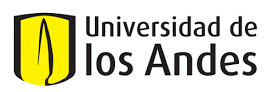

## Maestría en Inteligencia Analítica para la Toma de Decisiones
Camilo Torres Ovalle

Wilfredo Vega

## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

________________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

## 4.1. Desarrollo punto 1 - Little Red Riding Hood Network

In [6]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
 
# cargamos las combinaciones para entrenar la NN
train = np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]], "float32")
 
# y estos son los resultados que se obtienen, en el mismo orden
target = np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]], "float32")

In [7]:
# crearemos las capas de neuronas:
# La primera capa de entrada con 4 neuronas
# Una capa oculta (hidden) de 20 neuronas con función de activación “relu"
# Una capa con 4 neuronas de salida y función de activación "sigmoid"
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [8]:
# Métricas de evaluación
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [9]:
# Entrenamos el modelo con 1000 iteraciones de aprendizaje (epochs)
model.fit(train, target, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 222ms/step - loss: 0.2453 - binary_accuracy: 0.6667
Epoch 2/1000
3/3 [==============================] - 0s 667us/step - loss: 0.2442 - binary_accuracy: 0.6667
Epoch 3/1000
3/3 [==============================] - 0s 999us/step - loss: 0.2431 - binary_accuracy: 0.6667
Epoch 4/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.2421 - binary_accuracy: 0.6667
Epoch 5/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.2410 - binary_accuracy: 0.6667
Epoch 6/1000
3/3 [==============================] - 0s 667us/step - loss: 0.2399 - binary_accuracy: 0.6667
Epoch 7/1000
3/3 [==============================] - 0s 999us/step - loss: 0.2389 - binary_accuracy: 0.6667
Epoch 8/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.2378 - binary_accuracy: 0.6667
Epoch 9/1000
3/3 [==============================] - 0s 667us/step - loss: 0.2368 - binary_accuracy: 0.6667
Epoch 10/1000
3/3 [===============

3/3 [==============================] - 0s 667us/step - loss: 0.1740 - binary_accuracy: 0.8333
Epoch 78/1000
3/3 [==============================] - 0s 667us/step - loss: 0.1731 - binary_accuracy: 0.8333
Epoch 79/1000
3/3 [==============================] - 0s 667us/step - loss: 0.1722 - binary_accuracy: 0.8333
Epoch 80/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1713 - binary_accuracy: 0.8333
Epoch 81/1000
3/3 [==============================] - 0s 667us/step - loss: 0.1704 - binary_accuracy: 0.8333
Epoch 82/1000
3/3 [==============================] - 0s 333us/step - loss: 0.1694 - binary_accuracy: 0.8333
Epoch 83/1000
3/3 [==============================] - 0s 665us/step - loss: 0.1685 - binary_accuracy: 0.8333
Epoch 84/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1676 - binary_accuracy: 0.8333
Epoch 85/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1666 - binary_accuracy: 0.8333
Epoch 86/1000
3/3 [===========================

Epoch 153/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.1059 - binary_accuracy: 1.0000
Epoch 154/1000
3/3 [==============================] - 0s 666us/step - loss: 0.1052 - binary_accuracy: 1.0000
Epoch 155/1000
3/3 [==============================] - 0s 667us/step - loss: 0.1044 - binary_accuracy: 1.0000
Epoch 156/1000
3/3 [==============================] - 0s 667us/step - loss: 0.1036 - binary_accuracy: 1.0000
Epoch 157/1000
3/3 [==============================] - 0s 666us/step - loss: 0.1028 - binary_accuracy: 1.0000
Epoch 158/1000
3/3 [==============================] - 0s 667us/step - loss: 0.1020 - binary_accuracy: 1.0000
Epoch 159/1000
3/3 [==============================] - 0s 334us/step - loss: 0.1012 - binary_accuracy: 1.0000
Epoch 160/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1005 - binary_accuracy: 1.0000
Epoch 161/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0997 - binary_accuracy: 1.0000
Epoch 162/1000
3/3 [==

Epoch 229/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0572 - binary_accuracy: 1.0000
Epoch 230/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0567 - binary_accuracy: 1.0000
Epoch 231/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0562 - binary_accuracy: 1.0000
Epoch 232/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0557 - binary_accuracy: 1.0000
Epoch 233/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0553 - binary_accuracy: 1.0000
Epoch 234/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0548 - binary_accuracy: 1.0000
Epoch 235/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0543 - binary_accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0539 - binary_accuracy: 1.0000
Epoch 237/1000
3/3 [==============================] - 0s 665us/step - loss: 0.0534 - binary_accuracy: 1.0000
Epoch 238/1000
3/3 [

Epoch 305/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0304 - binary_accuracy: 1.0000
Epoch 306/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0302 - binary_accuracy: 1.0000
Epoch 307/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0300 - binary_accuracy: 1.0000
Epoch 308/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0297 - binary_accuracy: 1.0000
Epoch 309/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0295 - binary_accuracy: 1.0000
Epoch 310/1000
3/3 [==============================] - 0s 665us/step - loss: 0.0293 - binary_accuracy: 1.0000
Epoch 311/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0290 - binary_accuracy: 1.0000
Epoch 312/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0288 - binary_accuracy: 1.0000
Epoch 313/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0286 - binary_accuracy: 1.0000
Epoch 314/1000
3/3 

Epoch 381/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0174 - binary_accuracy: 1.0000
Epoch 382/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 383/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0171 - binary_accuracy: 1.0000
Epoch 384/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0170 - binary_accuracy: 1.0000
Epoch 385/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0169 - binary_accuracy: 1.0000
Epoch 386/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0168 - binary_accuracy: 1.0000
Epoch 387/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0167 - binary_accuracy: 1.0000
Epoch 388/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 389/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0164 - binary_accuracy: 1.0000
Epoch 390/1000
3/3 

Epoch 457/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0107 - binary_accuracy: 1.0000
Epoch 458/1000
3/3 [==============================] - 0s 333us/step - loss: 0.0107 - binary_accuracy: 1.0000
Epoch 459/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0106 - binary_accuracy: 1.0000
Epoch 460/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0105 - binary_accuracy: 1.0000
Epoch 461/1000
3/3 [==============================] - 0s 665us/step - loss: 0.0105 - binary_accuracy: 1.0000
Epoch 462/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 463/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 464/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 465/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 466/1000
3/3 [===

Epoch 533/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0071 - binary_accuracy: 1.0000
Epoch 534/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0071 - binary_accuracy: 1.0000
Epoch 535/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0071 - binary_accuracy: 1.0000
Epoch 536/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 537/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 538/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 539/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 540/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 541/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 542/1000
3/3 [=

Epoch 609/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0050 - binary_accuracy: 1.0000
Epoch 610/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0050 - binary_accuracy: 1.0000
Epoch 611/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0050 - binary_accuracy: 1.0000
Epoch 612/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0050 - binary_accuracy: 1.0000
Epoch 613/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0050 - binary_accuracy: 1.0000
Epoch 614/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 615/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 616/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 617/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 618/1000
3/3 [=====

Epoch 685/1000
3/3 [==============================] - 0s 665us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 686/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 687/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 688/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 689/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 690/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 691/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 692/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 693/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 694/1000
3/3 [====

Epoch 761/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 762/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 763/1000
3/3 [==============================] - 0s 332us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 764/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 765/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 766/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 767/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 768/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 769/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 770/1000
3/3 

Epoch 837/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 838/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 839/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 840/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 841/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 842/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 843/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 844/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 845/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 846/1000
3/3 [=

Epoch 913/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 914/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 915/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 916/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 917/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 918/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 919/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 920/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 921/1000
3/3 [==============================] - 0s 333us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 922/1000
3/3 

Epoch 989/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 990/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 991/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 992/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 993/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 994/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 995/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 996/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 997/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 998/1000
3/3

In [10]:
# evaluamos y Predecimos
scores = model.evaluate(train, target)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 160ms/step

binary_accuracy: 100.00%


## Desarrollo punto 2 - Boston House Price Prediction

1. Load the dataset using from sklearn.datasets import load_boston.

In [1]:
#cargamos la libraría y leemos los datos
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
import pandas as pd
import numpy as np

(506, 13)


In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

2. Create a DataFrame using the attribute .data from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the .feature_names attribute from the loading function of Scikit-learn.

In [4]:
# se genera el dataframe con la información de data
DF_x = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
# se crea el otro dataframe con la información del target
DF_y = pd.DataFrame(boston.target)

In [6]:
DF_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#4. Assign a new column to the DataFrame which holds the value to predict, that means, the .target attribute of the loading function of Scikit-learn. The name of this columns must be MEDV.

In [7]:
DF_y.columns =["MEDV"]

In [8]:
DF_y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
# Se unen los dos dataframe
datos = pd.concat([DF_x, DF_y], axis=1)

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


#5. Use the function .describe() from Pandas for obtaining statistics about each column.

In [11]:
# Vemos los estadísticos de cada variable del nuevo dataframe
datos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Desarrollo punto 3

1. Filter the dataset to just these features:
    Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
    Dependent: 'MEDV'.


In [12]:
datos1 = datos.loc[:,('LSTAT', 'INDUS', 'NOX', 'RM', 'AGE',"MEDV")]

In [13]:
datos1.head()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7
3,2.94,2.18,0.458,6.998,45.8,33.4
4,5.33,2.18,0.458,7.147,54.2,36.2


In [14]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
LSTAT    506 non-null float64
INDUS    506 non-null float64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
MEDV     506 non-null float64
dtypes: float64(6)
memory usage: 23.8 KB


#2. Generate a scatter matrix among the features mentioned above using Pandas (scatter_matrix) or Seaborn (pairplot).


In [15]:
import matplotlib.pyplot as plt
pd.scatter_matrix(datos1, alpha=0.2, figsize=(12, 12))#,diagonal='kde' 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D65D5F8630>,
      dtype=object)

#3. Generate the correlation matrix between these variables using numpy.corrcoef. Also include MEDV.

In [17]:
np.corrcoef(datos1)
matriz_cor=datos1.corr( method = 'pearson' , min_periods = 1 )
matriz_cor

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


##                                        Correlaciones
    Se puede ver como las variables:
    MEDV con LSTAT tienen una correlación del -0.73
    AGE y NOX tienen una correlación del 0.73
    NOX con INDUS tienen una correlación 0.76

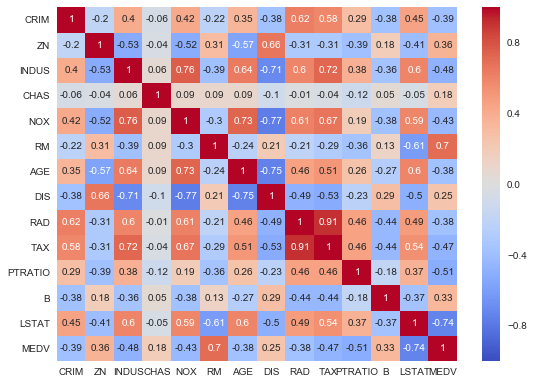

In [109]:
#4. BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

import seaborn as sns; sns.set()
sns.heatmap(data=datos.corr().round(2), cmap='coolwarm',robust=True, annot=True, annot_kws={"size":10})
plt.tight_layout()
plt.show()


## Desarrollo punto 4

## Modelo 1

In [41]:
#Se generan los nuevos dataset
D1 = datos1.loc[:,('RM','MEDV')]  

In [42]:
y = D1['MEDV'].values.reshape(-1,1)
X = D1['RM'].values.reshape(-1,1)

In [43]:
D1.describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [44]:
# función para dividir la data en train y test
from sklearn.model_selection import train_test_split

In [45]:
#realizamos la partición de la data
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.3,random_state=423)


In [46]:
#modelo lineal
from sklearn.linear_model import LinearRegression
# Initialize
linreg = LinearRegression(fit_intercept=True)

In [47]:
Mod1=linreg.fit(X_train,Y_train)

In [48]:
# se realiza la predicción
y_pred=Mod1.predict(X_test)

In [49]:
#Se calcula el MSE
from sklearn import metrics
import numpy as np
MSE_Mod1=('MSE:', metrics.mean_squared_error(Y_test, y_pred))
MSE_Mod1

('MSE:', 46.817742976519604)

## Modelo 2

In [65]:
#Se crea el modelo 2
D2 = datos1.loc[:,('LSTAT','MEDV')]
D1.describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [66]:
Y = D2['MEDV'].values.reshape(-1,1)
x = D2['LSTAT'].values.reshape(-1,1)

In [67]:
#realizamos la partición de la data
x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.3,random_state=423)

In [68]:
Mod2=linreg.fit(x_train,y_train)

In [69]:
# se realiza la predicción
y_pred2=Mod2.predict(x_test)

In [70]:
#Se calcula el MSE
from sklearn import metrics
import numpy as np
MSE_Mod2=('MSE:', metrics.mean_squared_error(y_test, y_pred2))
MSE_Mod2

('MSE:', 44.92847202601528)

In [71]:
#Comparación de los MSE
print(MSE_Mod1)
print(MSE_Mod2)

('MSE:', 46.817742976519604)
('MSE:', 44.92847202601528)


In [72]:
print('Coefficients: \n', Mod1.coef_)
print('Independent term: \n', Mod1.intercept_)

Coefficients: 
 [[-0.952074]]
Independent term: 
 [34.41070333]


In [73]:
print('Coefficients: \n', Mod2.coef_)
print('Independent term: \n', Mod2.intercept_)

Coefficients: 
 [[-0.952074]]
Independent term: 
 [34.41070333]


#Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data

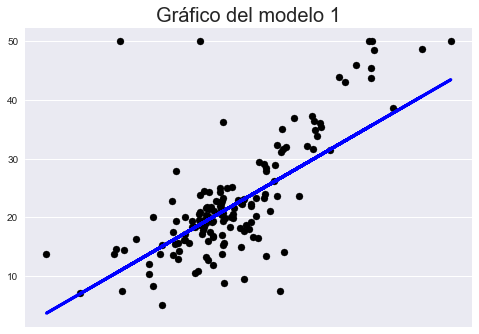

In [74]:
# Grafico modelo 1
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks
plt.title('Gráfico del modelo 1', fontsize=20)

plt.show()

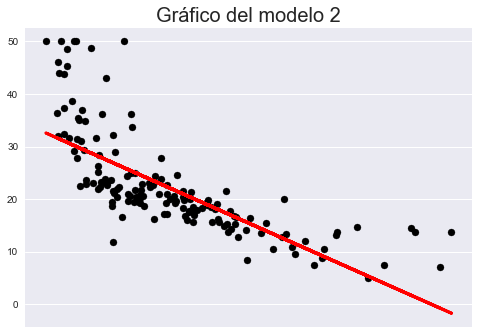

In [75]:
# Grafico modelo 2
plt.scatter(x_test, y_test,  color='black')

#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(x_test, y_pred2, color='red', linewidth=3)

plt.xticks(())
plt.yticks
plt.title('Gráfico del modelo 2',fontsize=20)

plt.show()

## Desarrollo punto 5

#1. Generate a 70-30 partitioning of the data using all the features. (Do not include the dependent variable MEDV)

Train the following models:
Train a linear regression model using the scaled data.
Report the mean square error on the test set
Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the scaled data.
Report the mean square error on the test set
Which model has better performance? Why?

In [76]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [77]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [78]:
DX = datos.drop(['MEDV'], axis = 1)
DY = datos['MEDV']

In [79]:
DX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [80]:
DY

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [81]:
# sacamos la variable

#realizamos la partición de la data

X_entrena, X_prueba, Y_entrena, Y_prueba=train_test_split(DX,DY,test_size=0.3,random_state=1234)


#2. Train a linear regression model with the objective of predicting the output variable MEDV.


In [82]:
#modelo lineal
from sklearn.linear_model import LinearRegression
# Initialize
LinReg = LinearRegression(fit_intercept=True)

In [83]:
Mod_all=LinReg.fit(X_entrena,Y_entrena)
Mod_all

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
# se realiza la predicción
y_pred_all=Mod_all.predict(X_prueba)

#3. Report the mean square error on the test set


In [85]:
#Se calcula el MSE
MSE_Mod_all=('MSE:', metrics.mean_squared_error(Y_prueba, y_pred_all))
MSE_Mod_all

('MSE:', 24.129688003233642)

#4. Train a regression model using MLPRegressor in order to predict the output variableMEDV.


In [86]:
#Cargamos el algorítmo
from sklearn.neural_network import MLPRegressor
nnR = MLPRegressor(solver='lbfgs', hidden_layer_sizes=500, max_iter=2000,random_state=1)

In [87]:
Mod_nnR=nnR.fit(X_entrena,Y_entrena)

In [88]:
# se realiza la predicción
y_pred_nnR=Mod_nnR.predict(X_prueba)

#5. Report the mean square error on the test set


In [89]:
#Se calcula el MSE
MSE_Mod_nnR=('MSE:', metrics.mean_squared_error(Y_prueba, y_pred_nnR))
MSE_Mod_nnR

('MSE:', 11.328650210513889)

#6. Scale the data so that they have zero mean variance one per feature (only  XX )

In [90]:
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
sc_x = StandardScaler()


In [91]:
# se realiza la partición
X_entrena_s, X_prueba_s, Y_entrena_s, Y_prueba_s=train_test_split(DX,DY,test_size=0.3,random_state=1234)

In [92]:
# se escalan los datos

scaler = StandardScaler()  
scaler.fit(X_train)  
sc_X_train = scaler.transform(X_entrena_s)  
sc_X_test = scaler.transform(X_prueba_s)  

In [93]:
# Se inicia el algorítmo y se corre el modeo
LinReg_s = LinearRegression(fit_intercept=True)

Mod_all_s=LinReg_s.fit(X_entrena_s,Y_entrena_s)
Mod_all_s

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
# se realiza la predicción
y_pred_all_s=Mod_all.predict(X_prueba_s)

Report the mean square error on the test set

In [95]:
#Se calcula el MSE
MSE_Mod_all_s=('MSE:', metrics.mean_squared_error(Y_prueba_s, y_pred_all_s))
MSE_Mod_all_s

('MSE:', 24.129688003233642)

 2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) 
    and with the **scaled data**.

In [96]:
#Cargamos el algorítmo
nnR_s = MLPRegressor(solver='lbfgs', hidden_layer_sizes=500, max_iter=2000,random_state=1)


In [97]:
Mod_nnR_s=nnR.fit(X_entrena_s,Y_entrena_s)

In [98]:
# se realiza la predicción
y_pred_nnR_s=Mod_nnR.predict(X_prueba_s)

In [99]:

#5. Report the mean square error on the test set


In [100]:
#Se calcula el MSE
MSE_Mod_nnR_s=('MSE:', metrics.mean_squared_error(Y_prueba_s, y_pred_nnR_s))
MSE_Mod_nnR_s

('MSE:', 11.328650210513889)

In [105]:
M1 = pd.DataFrame(index=MSE_Mod1)
M2 = pd.DataFrame(index=MSE_Mod2)
M3 = pd.DataFrame(index=MSE_Mod_all)
M4 = pd.DataFrame(index=MSE_Mod_nnR)
M5 = pd.DataFrame(index=MSE_Mod_all_s)
M6 = pd.DataFrame(index=MSE_Mod_nnR_s)


In [106]:
MSE_comp = pd.concat([M1,M2,M3, M4, M5, M6], axis=1)
print(MSE_comp)
#comparativo = pd.concat[(MSE_comp,nombres)]

Empty DataFrame
Columns: []
Index: [MSE:, 46.817742976519604, 44.92847202601528, 24.129688003233642, 11.328650210513889]


## Conclusión

Los dos modelos de regresión **"MLPRegressor" de la librería neural_network de sklearn** que se implementaron ( con la data normal y con la data escalonada) son los que mejor **MSE = 11.3286 ** obtienen, esto gracias a que los modelos de redes neuronales que tienen mejor capacidad de predicción. 